Advanced EDA techniques WITH PYTHON¶
What we are doing in this kernel is something like:

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!

In [88]:
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
#
## remover item de uma lista
!pip install --upgrade pip
!pip install lightgbm
!pip install category_encoders

In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from scipy.stats import stats, norm
pd.set_option('display.max_columns', 100)

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score

In [90]:


# Carregando o conjunto de dados Boston House Prices
breast_cancer = load_breast_cancer()

# Extraindo os dados e os rótulos
X = breast_cancer.data  # features
y = breast_cancer.target  # labels

# Exibindo informações sobre o conjunto de dados
print("Tamanho do conjunto de dados:", X.shape)

print(breast_cancer.keys())

print(breast_cancer.target_names)

print(breast_cancer.feature_names)

Tamanho do conjunto de dados: (569, 30)
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [91]:


# Exibindo as primeiras linhas do conjunto de dados
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
target = 'Survived'
categorical_vars = [x for x in df.select_dtypes(include=['object']).columns if x!=target]
continuous_vars = [x for x in df.select_dtypes(exclude =['object']).columns if x!= target]
print(f'categorical_vars: {categorical_vars}')
print(f'continuous_vars: {continuous_vars}')

categorical_vars: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
continuous_vars: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


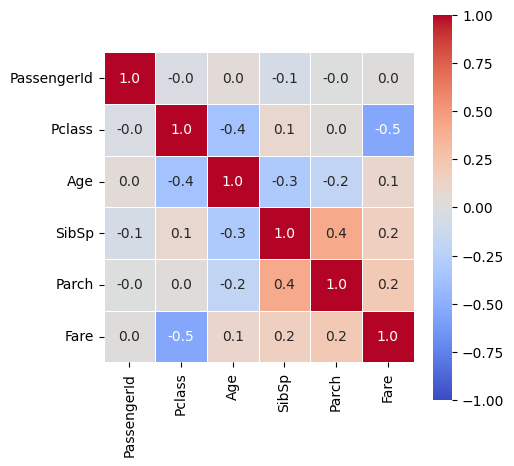

In [94]:
#correlation matrix
corrmat = df[continuous_vars].corr()
f, ax = plt.subplots(figsize=(5, 5))

# vamx: valor máximo
# vmin: valor mínimo
# annot: se True, escreve os dados no mapa de calor
# fmt: formatação dos dados decimais
# linewidth: largura da linha que divide os quadrados
# cmap: mapa de cores
# square: se True, os quadrados são desenhados

sns.heatmap(corrmat, vmax=1, vmin=-1, annot=True, 
            fmt=".1f", linewidth=.5, cmap='coolwarm', 
            square=True,);

In [95]:
# Quantidade dados missing per coluna

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent.head(20)


Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
Sex            0.000000
Parch          0.000000
SibSp          0.000000
Fare           0.000000
Ticket         0.000000
dtype: float64

In [96]:
saleprice_scaler = StandardScaler().fit_transform(df['Fare'].values[:, np.newaxis])
lower_range = saleprice_scaler[saleprice_scaler[:,0].argsort()][:10]
highter_range = saleprice_scaler[saleprice_scaler[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(lower_range)
print('\nouter range (high) of the distribution:')
print(highter_range)


outer range (low) of the distribution:
[[-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]
 [-0.64842165]]

outer range (high) of the distribution:
[[4.33533223]
 [4.6344169 ]
 [4.6344169 ]
 [4.64700108]
 [4.64700108]
 [4.64700108]
 [4.64700108]
 [9.66716653]
 [9.66716653]
 [9.66716653]]


In [97]:
#applying log transformation para logaritmo natural
df['resplog'] = np.log(df['Fare'])

# Utilização das funções .any() .all() .sum()
# all(): Retorna True se todos os elementos de um iterável forem verdadeiros, caso contrário retorna False.
# sum(): Retorna a soma dos elementos de um iterável. Quando aplicado a uma lista de booleanos, ele conta o número de True, pois True é interpretado como 1 e False como 0.
# any(): Retorna True se pelo menos um dos elementos de um iterável for verdadeiro, caso contrário retorna False.
inf_values_any = df.isin([np.inf, -np.inf]).any()
print("*"*40)
print("Valores infinitos com func .any():")
print(inf_values_any)

inf_values_all = df.isin([np.inf, -np.inf]).all()
print("*"*40)
print("Valores infinitos com func .all():")
print(inf_values_all)

inf_values_sum = df.isin([np.inf, -np.inf]).sum()
print("*"*40)
print("Valores infinitos com func .sum():")
print(inf_values_sum)


****************************************
Valores infinitos com func .any():
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
resplog         True
dtype: bool
****************************************
Valores infinitos com func .all():
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
resplog        False
dtype: bool
****************************************
Valores infinitos com func .sum():
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Emba

/home/david/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [98]:
# Exibir as colunas que contêm valores infinitos
columns_with_inf_values = inf_values_any[inf_values_any].index

# Exibir os valores infinitos
inf_values = df[columns_with_inf_values].loc[df.isin([np.inf, -np.inf]).any(axis=1)]
inf_values

,resplog
179,-inf
263,-inf
271,-inf
277,-inf
302,-inf
413,-inf
466,-inf
481,-inf
597,-inf
633,-inf


/tmp/ipykernel_632101/2621901298.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['resplog'], fit=norm);


AttributeError: scipy.stats.stats is deprecated and has no attribute displot. Try looking in scipy.stats instead.

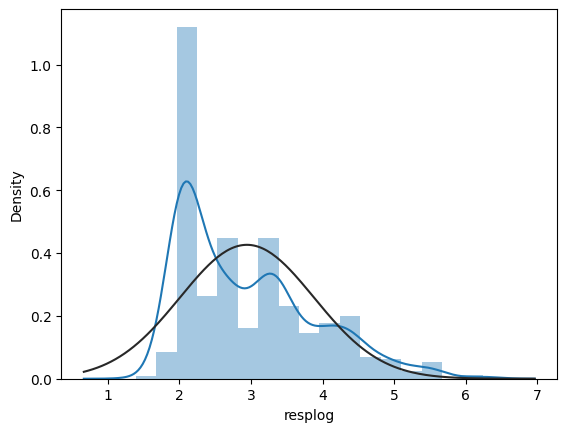

<Figure size 640x480 with 0 Axes>

In [99]:

df['resplog'] = df['resplog'].replace([np.inf, -np.inf], np.nan)
#transformed histogram and normal probability plot
sns.distplot(df['resplog'], fit=norm);
fig = plt.figure()
res = stats.displot(df['resplog'], plot=plt)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  resplog      876 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


(array([  2.,   5., 267.,  75.,  65.,  67.,  39., 104.,  58.,  23.,  46.,
         28.,  44.,  11.,  17.,   5.,  11.,   6.,   0.,   3.]),
 array([1.38941449, 1.63189213, 1.87436978, 2.11684742, 2.35932507,
        2.60180271, 2.84428036, 3.086758  , 3.32923565, 3.57171329,
        3.81419094, 4.05666858, 4.29914623, 4.54162387, 4.78410152,
        5.02657916, 5.26905681, 5.51153445, 5.7540121 , 5.99648974,
        6.23896739]),
 <BarContainer object of 20 artists>)

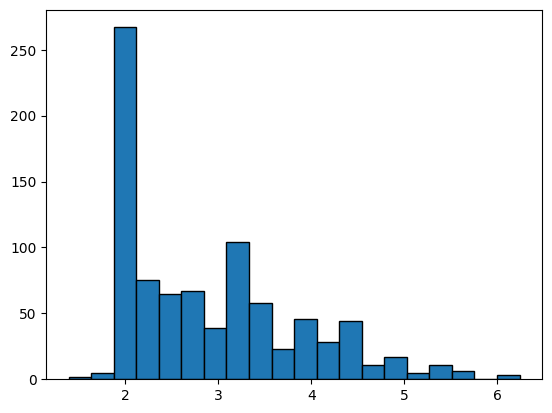

In [101]:
plt.hist(df['resplog'], bins=20, edgecolor='black')

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

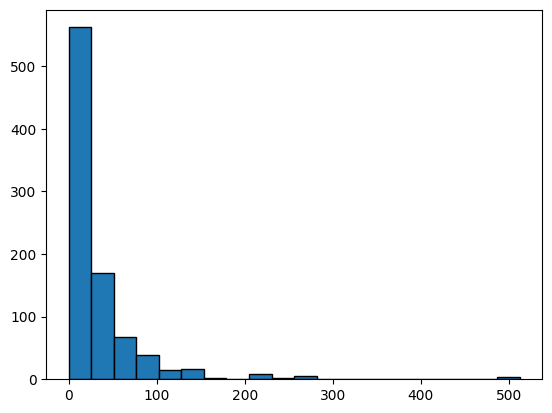

In [102]:
plt.hist(df['Fare'], bins=20, edgecolor='black')

In [103]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
resplog        float64
dtype: object

In [104]:
# Cria df numa coluna dados aleatorios enter 0 e 1 e outra com valores entre 0  e 5000 com a quantidade de linhas de 300
df_2 = pd.DataFrame(np.random.rand(300, 3), columns=['A', 'B', 'C'])
print('max_value:', df_2['A'].max())
print('min_value:', df_2['A'].min())

max_value: 0.9978299872682198
min_value: 0.0004159878661141869


In [105]:
df_csv = pd.DataFrame({'A': [0, 1], 'B': [3000, 3111]})
df_csv

,A,B
0,0,3000
1,1,3111


In [106]:
# Removing constants and key columns
porcentagem = 0.75 
df = df.loc[:, (df.nunique() > 1) & ((df.nunique()/len(df))<porcentagem)]

In [107]:
df['Cabin'].value_counts()

# de cada valor da colula pegar somente a primeira letra
df['Cabin_letter'] = df['Cabin'].str[0].astype(str)
df.drop('Cabin', axis=1, inplace=True)

In [108]:
target = 'Survived'
categorical_vars = [x for x in df.select_dtypes(include=['object']).columns if x!=target]
continuous_vars = [x for x in df.select_dtypes(exclude =['object']).columns if x!= target]
print(f'categorical_vars: {categorical_vars}')
print(f'continuous_vars: {continuous_vars}')


categorical_vars: ['Sex', 'Embarked', 'Cabin_letter']
continuous_vars: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'resplog']


<Axes: xlabel='Survived'>

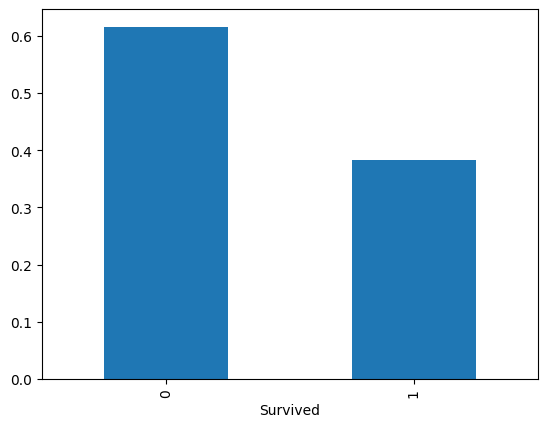

In [109]:
# Grafica tardet
df['Survived'].value_counts(1).plot.bar()

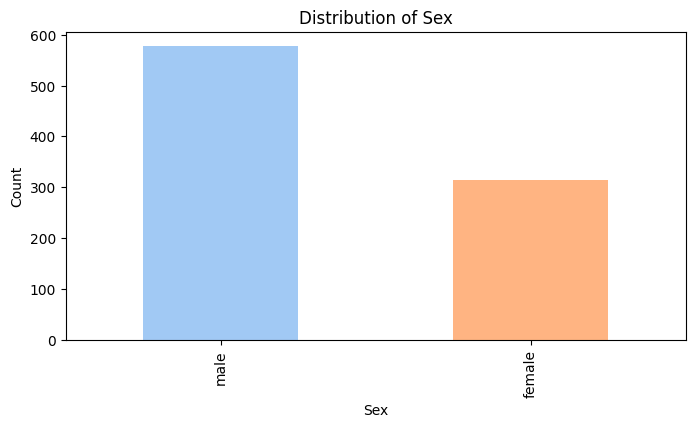

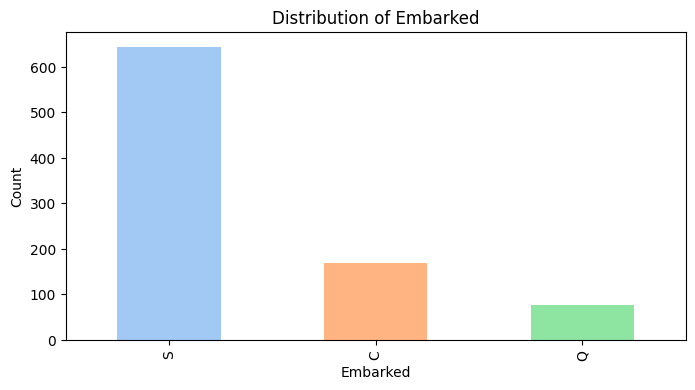

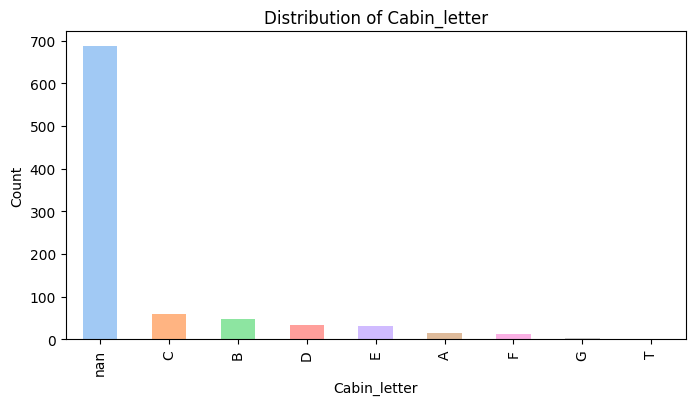

In [110]:
#sns.set_style("white")
colors = sns.color_palette('pastel') 

for var in categorical_vars:
    counts = df[var].value_counts()
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar', color=colors)
    plt.title(f'Distribution of {var}')
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.show()



/tmp/ipykernel_632101/1921429412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Survived', data=attrition_avg, palette='pastel')


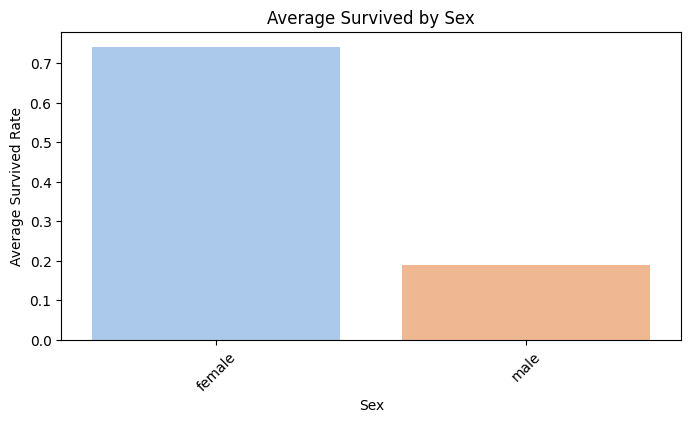

/tmp/ipykernel_632101/1921429412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Survived', data=attrition_avg, palette='pastel')


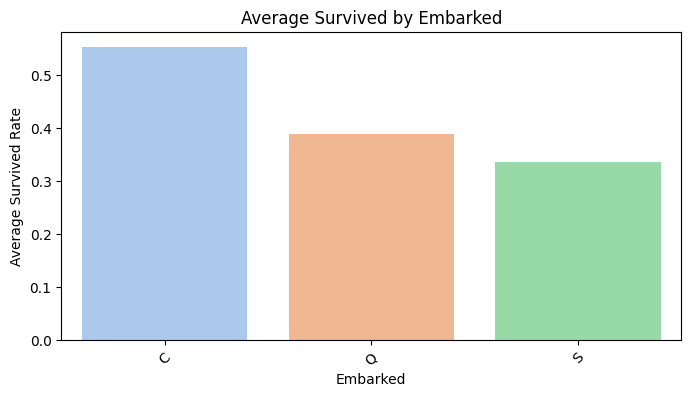

/tmp/ipykernel_632101/1921429412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Survived', data=attrition_avg, palette='pastel')


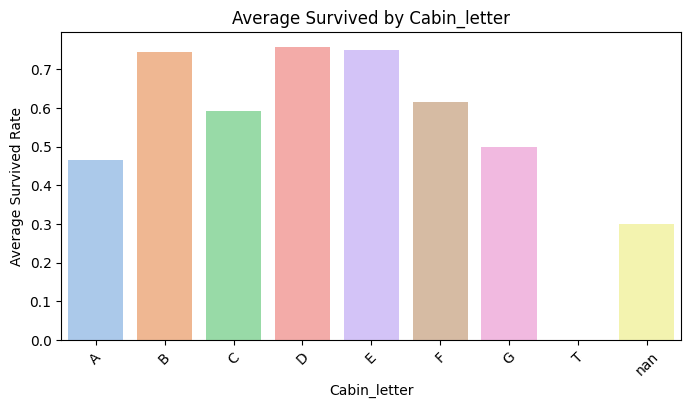

In [112]:
for var in categorical_vars:

    attrition_avg = df.groupby(var)['Survived'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=var, y='Survived', data=attrition_avg, palette='pastel')
    plt.title(f'Average Survived by {var}')
    plt.ylabel('Average Survived Rate')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.show()

# Entendimento: é fazer uma contagem de quantos sobreviveram por classe 
# e pegar a media de cada um deles e saber quanto porcento da classe sobreviveu

In [113]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

encoder = TargetEncoder(cols=categorical_vars)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

### Criação Light gbm SEM classweight

In [114]:
from sklearn.utils.class_weight import compute_class_weight
from lightgbm import LGBMClassifier

In [115]:
# Sem class weight
lgb_model = LGBMClassifier()
lgb_model.fit(X_train_encoded, y_train)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [116]:
# Make predictions
y_pred = lgb_model.predict(X_test_encoded)
y_pred_proba = lgb_model.predict_proba(X_test_encoded)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for ROC AUC
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8156
ROC AUC: 0.8723
F1 Score: 0.7755
Precision: 0.7808
Recall: 0.7703


### Criação Light gbm COM classweight

In [117]:
# Calculate COM class weight
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
print('Weight:', weights)

# Create a dictionary with class labels as keys and computed weights as values
class_weight_dict = dict(zip(classes, weights))
print('Dict:',class_weight_dict)

# Initialize the LGBM model with class weights
lgb_model = LGBMClassifier(class_weight=class_weight_dict)
lgb_model.fit(X_train_encoded, y_train)

Weight: [0.8018018  1.32835821]
Dict: {0: 0.8018018018018018, 1: 1.328358208955224}
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMClassifier(class_weight={0: 0.8018018018018018, 1: 1.328358208955224})

In [118]:
# Make predictions
y_pred = lgb_model.predict(X_test_encoded)
y_pred_proba = lgb_model.predict_proba(X_test_encoded)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for ROC AUC
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7989
ROC AUC: 0.8722
F1 Score: 0.7632
Precision: 0.7436
Recall: 0.7838


In [119]:
# Weight: [0.8018018  1.32835821]
y_train.value_counts()
# 444 + 268 = 712
712/268 , 1.32835821/0.8018018

(2.656716417910448, 1.6567164229364413)

In [120]:
#features.remove(['Survived','PassengerId','Name','Ticket'])
nova_lista = [x for x in list(df.columns) if x not in ['Survived','PassengerId','Name','Ticket']]
nova_lista

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'resplog',
 'Cabin_letter']

In [127]:
from EDA_utils import univariate_analysis_plots

In [46]:
def univariate_analysis_plots(data, features, histplot=True, barplot=False, mean=None, text_y=0.5,    
                              outliers=False, kde=False, color='#8d0801', figsize=(24, 12)):
    '''
    Generate plots for univariate analysis.

    This function generates histograms, horizontal bar plots 
    and boxplots based on the provided data and features. 

    Args:
        data (DataFrame): The DataFrame containing the data to be visualized.
        features (list): A list of feature names to visualize.
        histplot (bool, optional): Generate histograms. Default is True.
        barplot (bool, optional): Generate horizontal bar plots. Default is False.
        mean (bool, optional): Generate mean bar plots of specified feature instead of proportion bar plots. Default is None.
        text_y (float, optional): Y coordinate for text on bar plots. Default is 0.5.
        outliers (bool, optional): Generate boxplots for outliers visualization. Default is False.
        kde (bool, optional): Plot Kernel Density Estimate in histograms. Default is False.
        color (str, optional): The color of the plot. Default is '#8d0801'.
        figsize (tuple, optional): The figsize of the plot. Default is (24, 12).

    Returns:
        None

    Raises:
        CustomException: If an error occurs during the plot generation.

    '''
    
    try:
        # Get num_features and num_rows and iterating over the sublot dimensions.
        num_features = len(features)
        num_rows = num_features // 3 + (num_features % 3 > 0) 
        
        fig, axes = plt.subplots(num_rows, 3, figsize=figsize)  

        for i, feature in enumerate(features):
            row = i // 3  
            col = i % 3  

            ax = axes[row, col] if num_rows > 1 else axes[col] 
            
            if barplot:
                if mean:
                    data_grouped = data.groupby([feature])[[mean]].mean().reset_index()
                    data_grouped[mean] = round(data_grouped[mean], 2)
                    bars = ax.barh(y=data_grouped[feature], width=data_grouped[mean], color=color)
                    for index, value in enumerate(data_grouped[mean]):
                        # Adjust the text position based on the width of the bars
                        ax.text(value + text_y, index, f'{value:.1f}', va='center', fontsize=15)
                else:
                    data_grouped = data.groupby([feature])[[feature]].count().rename(columns={feature: 'count'}).reset_index()
                    data_grouped['pct'] = round(data_grouped['count'] / data_grouped['count'].sum() * 100, 2)
                    bars = ax.barh(y=data_grouped[feature], width=data_grouped['pct'], color=color)
                    for index, value in enumerate(data_grouped['pct']):
                        # Adjust the text position based on the width of the bars
                        ax.text(value + text_y, index, f'{value:.1f}%', va='center', fontsize=15)
                
                ax.set_yticks(ticks=range(data_grouped[feature].nunique()), labels=data_grouped[feature].tolist(), fontsize=15)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.grid(False)
                ax.get_xaxis().set_visible(False)
                
            elif outliers:
                # Plot univariate boxplot.
                sns.boxplot(data=data, x=feature, ax=ax, color=color)

            else:
                # Plot histplot.
                sns.histplot(data=data, x=feature, kde=kde, ax=ax, color=color, stat='percent')

            ax.set_title(feature)  
            ax.set_xlabel('')  
        
        # Remove unused axes.
        if num_features < len(axes.flat):
            for j in range(num_features, len(axes.flat)):
                fig.delaxes(axes.flat[j])

        plt.tight_layout()
    
    except Exception as e:
        print(e)
        #raise CustomException(e, sys)

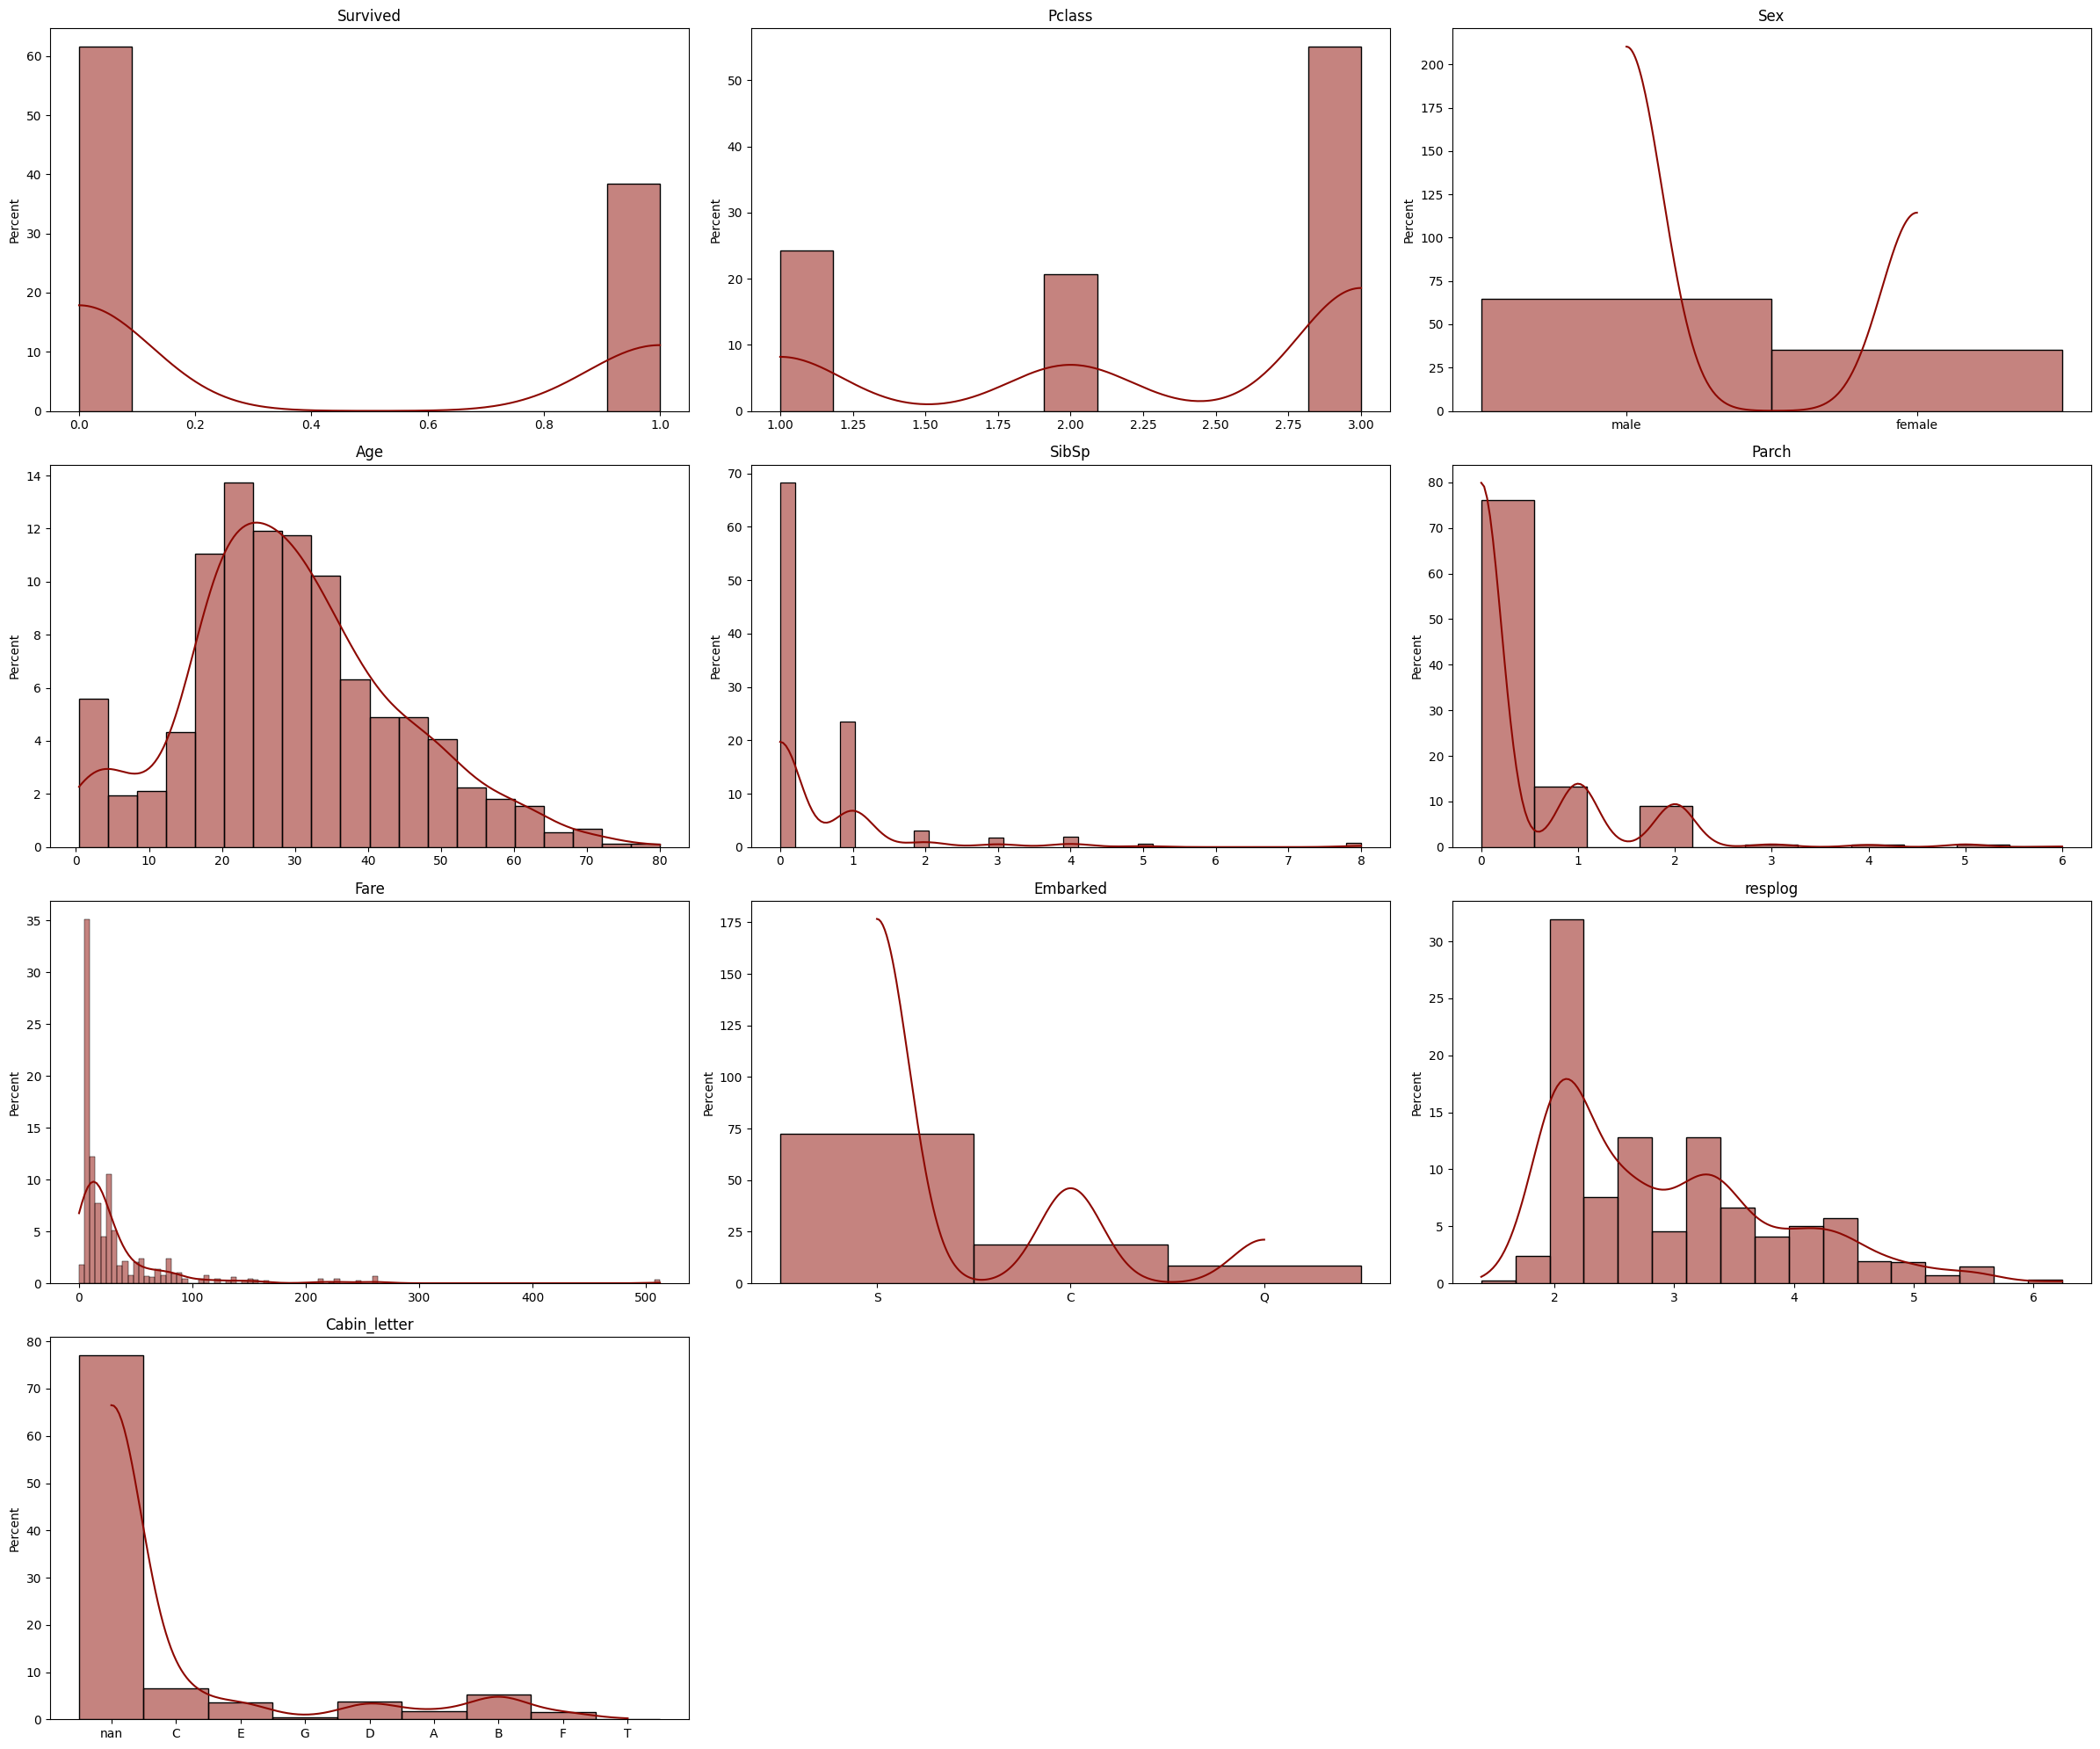

In [128]:

features=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'resplog', 'Cabin_letter']

univariate_analysis_plots(df, features, histplot=True, barplot=False, mean=None, text_y=0.5,    
                              outliers=False, kde=True, color='#8d0801', figsize=(24,20))



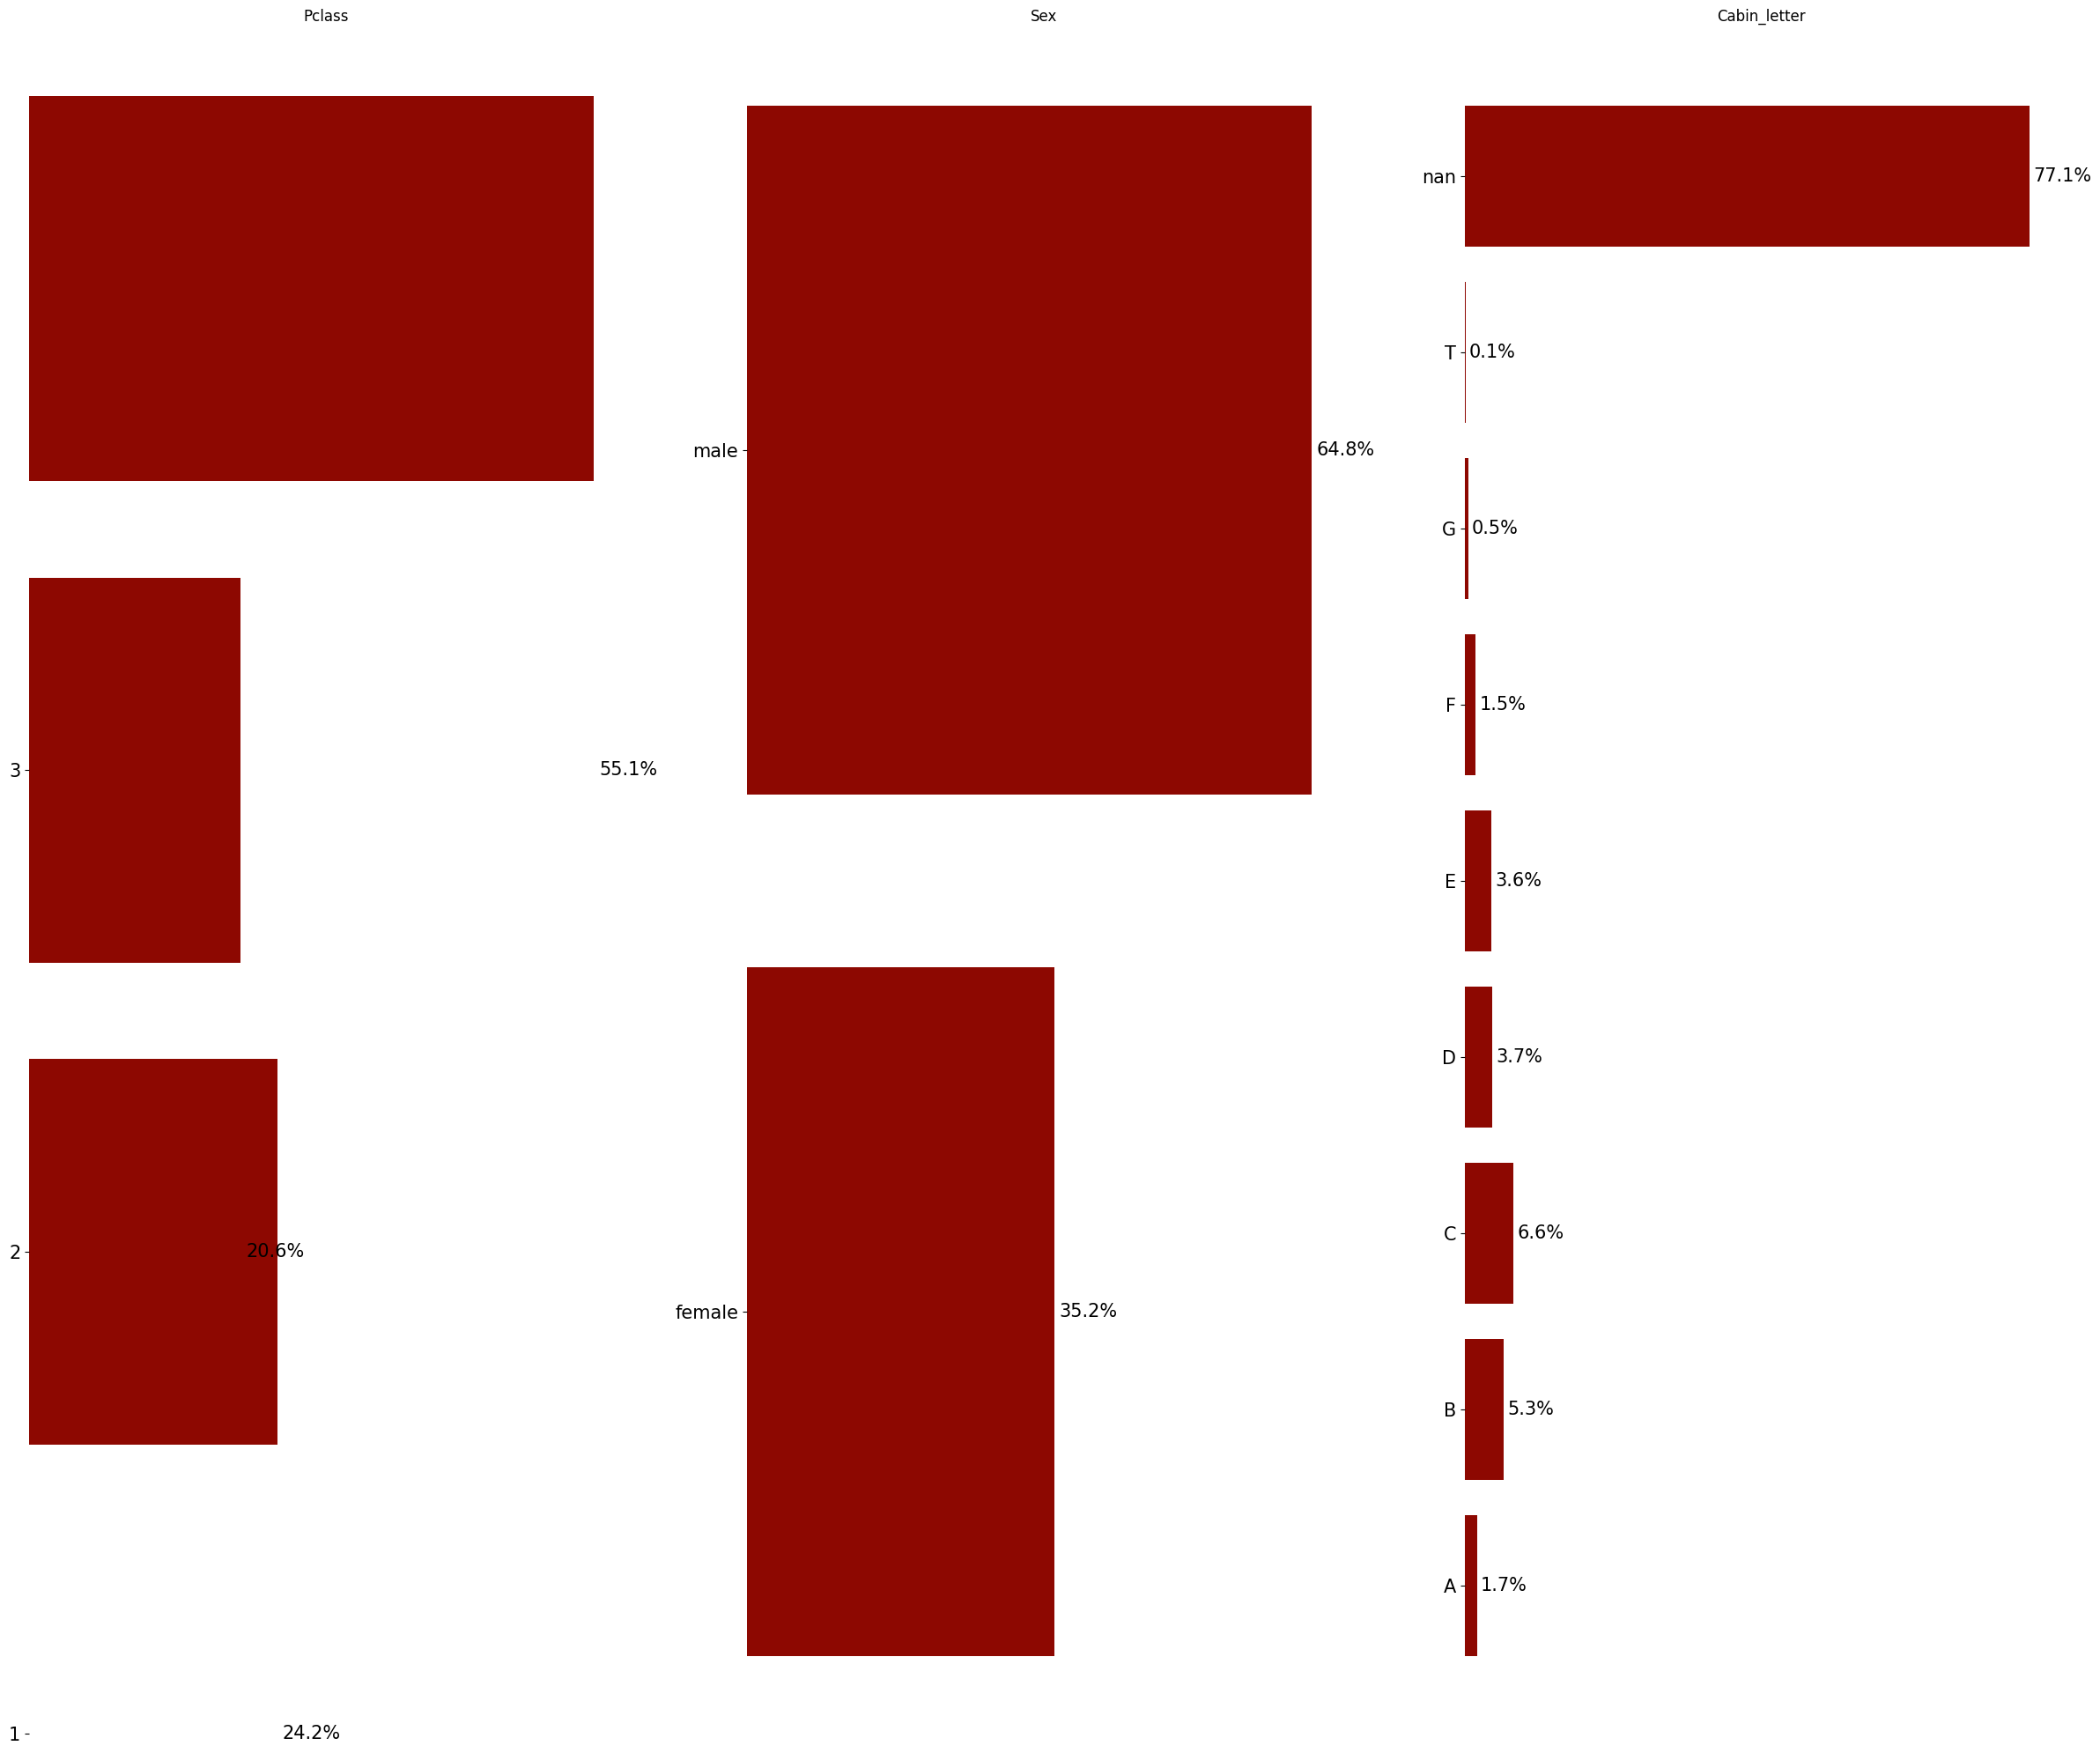

In [130]:
features=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'resplog', 'Cabin_letter']
features=['Pclass', 'Sex', 'Cabin_letter']
univariate_analysis_plots(df, features, histplot=False, barplot=True, mean=None, text_y=0.5,    
                              outliers=False, kde=True, color='#8d0801', figsize=(24,20))

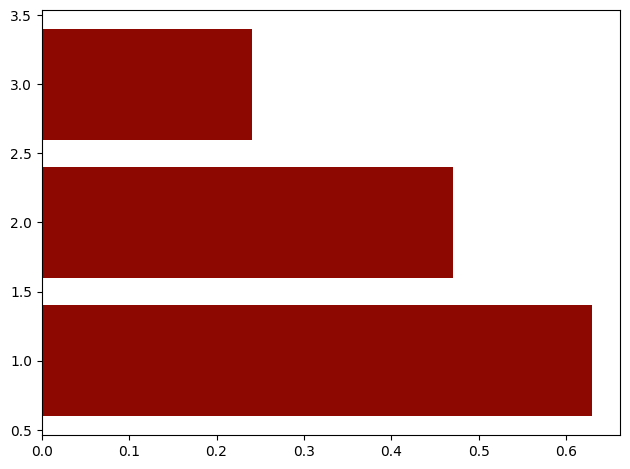

In [129]:
fig, ax = plt.subplots()  # Create a figure and axis
feature = 'Pclass'
data = df
mean='Survived'
color='#8d0801'
data_grouped = data.groupby([feature])[[mean]].mean().reset_index()
data_grouped[mean] = round(data_grouped[mean], 2)

ax.barh(y=data_grouped[feature], width=data_grouped[mean], color=color)
plt.tight_layout()
plt.show()